In [1]:
import pandas as pd

file_path_densite = '../data/raw/population_densite.csv'
df_densite = pd.read_csv(file_path_densite)

print(df_densite.columns)
print(df_densite.head(3))

Index(['IdDepartement', 'Département', '0 à 19 ans', '20 à 39 ans',
       '40 à 59 ans', '60 à 74 ans', '75 ans et plus', 'Total', 'LONGITUDE',
       'LATITUDE', 'longitude_decimal', 'latitude_decimal', 'geopoint',
       'Niv_densité', 'Type_densité', 'P_rural'],
      dtype='object')
  IdDepartement Département 0 à 19 ans 20 à 39 ans 40 à 59 ans 60 à 74 ans  \
0             1         Ain    173 034     156 038     184 123     111 711   
1             2       Aisne    123 458     112 227     130 715      97 558   
2             3      Allier     65 881      62 661      82 386      71 959   

  75 ans et plus    Total   LONGITUDE   LATITUDE  longitude_decimal  \
0         63 720  688 626  5°20'56" E  46°05'58"           5.348889   
1         54 859  518 817  3°33'30" E  49°33'34"           3.558333   
2         49 712  332 599  3°11'18" E  46°23'37"           3.188333   

   latitude_decimal                              geopoint  Niv_densité  \
0         46.099444  46.099444444444444

/tmp/ipykernel_15479/2601406281.py:17: DtypeWarning: Columns (15,16,17,18,19,20,21,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')


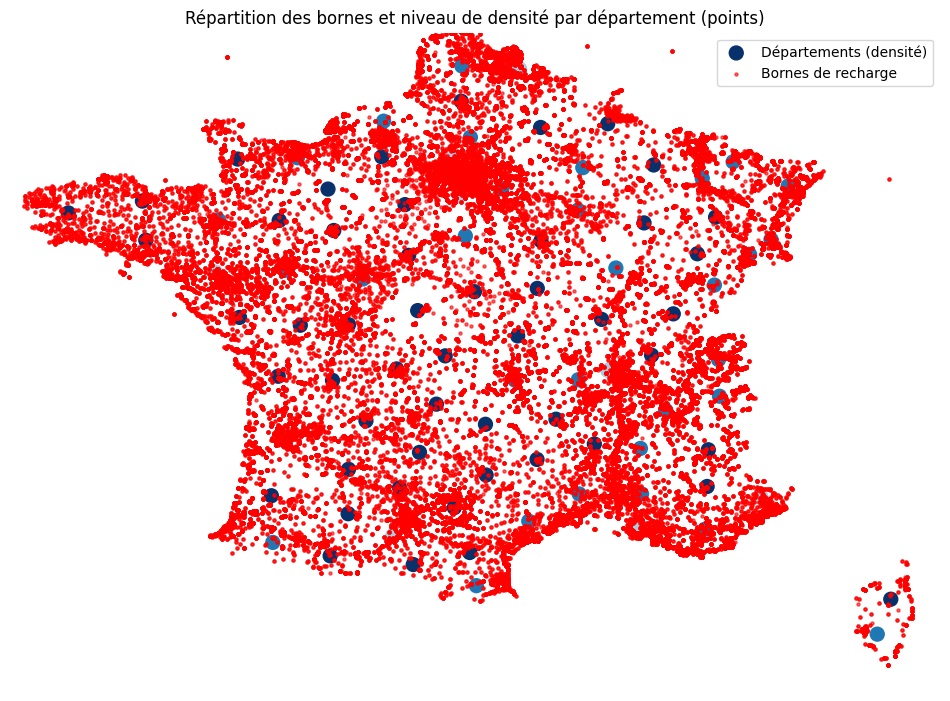

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Charger population
pop = pd.read_csv("../data/raw/population_densite.csv", delimiter=",", encoding='utf-8')
for col in ['0 à 19 ans','20 à 39 ans','40 à 59 ans','60 à 74 ans','75 ans et plus','Total']:
    pop[col] = pop[col].str.replace('\xa0', '').str.replace(' ','').str.replace(',','').astype(int)
pop['Niv_densité'] = pop['Niv_densité'].astype(int)

# Créer GeoDataFrame avec points des départements
pop['geometry'] = pop.apply(lambda row: Point(row['longitude_decimal'], row['latitude_decimal']), axis=1)
gdf_pop = gpd.GeoDataFrame(pop, geometry='geometry', crs="EPSG:4326")

# Charger bornes
bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')
bornes = bornes[(bornes['consolidated_latitude'].notnull()) & (bornes['consolidated_longitude'].notnull())]
gdf_bornes = gpd.GeoDataFrame(
    bornes, geometry=gpd.points_from_xy(bornes.consolidated_longitude, bornes.consolidated_latitude), crs="EPSG:4326"
)

# Carte simple avec points départements colorés selon Niv_densité
fig, ax = plt.subplots(figsize=(12,12))

colors = {1: '#a6cee3', 2: '#1f78b4', 3: '#08306b'}
gdf_pop['color'] = gdf_pop['Niv_densité'].map(colors)

gdf_pop.plot(ax=ax, color=gdf_pop['color'], markersize=100, label='Départements (densité)')

# Bornes en rouge
gdf_bornes.plot(ax=ax, color='red', markersize=5, alpha=0.6, label='Bornes de recharge')

plt.legend()
plt.title("Répartition des bornes et niveau de densité par département (points)")

# Limites France métropolitaine pour zoomer (optionnel)
ax.set_xlim(-5, 10)
ax.set_ylim(41, 51)
ax.set_axis_off()
plt.show()


/tmp/ipykernel_15479/2838334289.py:13: DtypeWarning: Columns (15,16,17,18,19,20,21,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')


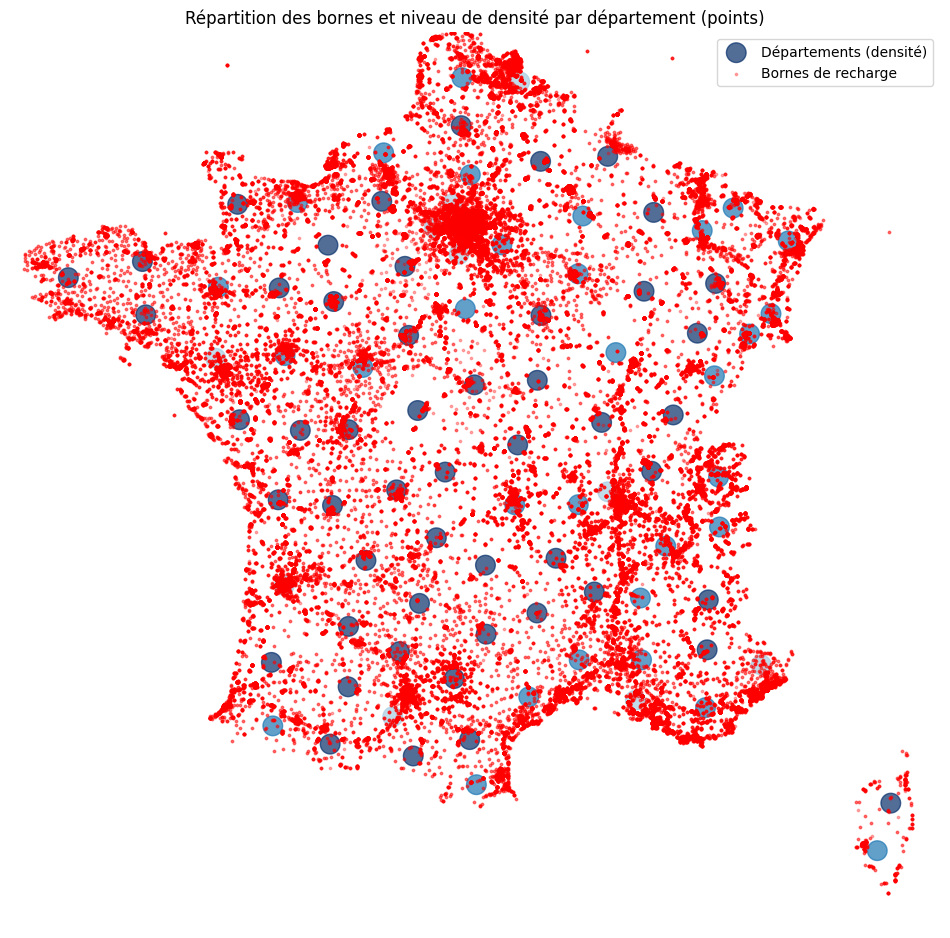

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Charger les données population
pop = pd.read_csv("../data/raw/population_densite.csv", delimiter=",", encoding='utf-8')
pop['Niv_densité'] = pop['Niv_densité'].astype(int)
pop['geometry'] = pop.apply(lambda row: Point(row['longitude_decimal'], row['latitude_decimal']), axis=1)
gdf_pop = gpd.GeoDataFrame(pop, geometry='geometry', crs="EPSG:4326")

# Charger bornes
bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')
bornes = bornes[(bornes['consolidated_latitude'].notnull()) & (bornes['consolidated_longitude'].notnull())]

# Garder bornes en France métropolitaine (approximation par longitude/latitude)
bornes = bornes[
    (bornes['consolidated_longitude'] >= -5) & (bornes['consolidated_longitude'] <= 10) &
    (bornes['consolidated_latitude'] >= 41) & (bornes['consolidated_latitude'] <= 51)
]

gdf_bornes = gpd.GeoDataFrame(
    bornes, geometry=gpd.points_from_xy(bornes.consolidated_longitude, bornes.consolidated_latitude), crs="EPSG:4326"
)

# Couleurs pour niveaux de densité
colors = {1: '#a6cee3', 2: '#1f78b4', 3: '#08306b'}
gdf_pop['color'] = gdf_pop['Niv_densité'].map(colors)

fig, ax = plt.subplots(figsize=(12,12))

# Départements en points plus gros et couleur selon densité
gdf_pop.plot(ax=ax, color=gdf_pop['color'], markersize=200, alpha=0.7, label='Départements (densité)')

# Bornes en rouge, plus petites, transparentes
gdf_bornes.plot(ax=ax, color='red', markersize=3, alpha=0.3, label='Bornes de recharge')

plt.legend()
plt.title("Répartition des bornes et niveau de densité par département (points)")

ax.set_xlim(-5, 10)
ax.set_ylim(41, 51)
ax.set_axis_off()
plt.show()


/tmp/ipykernel_15479/819130659.py:16: DtypeWarning: Columns (15,16,17,18,19,20,21,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')


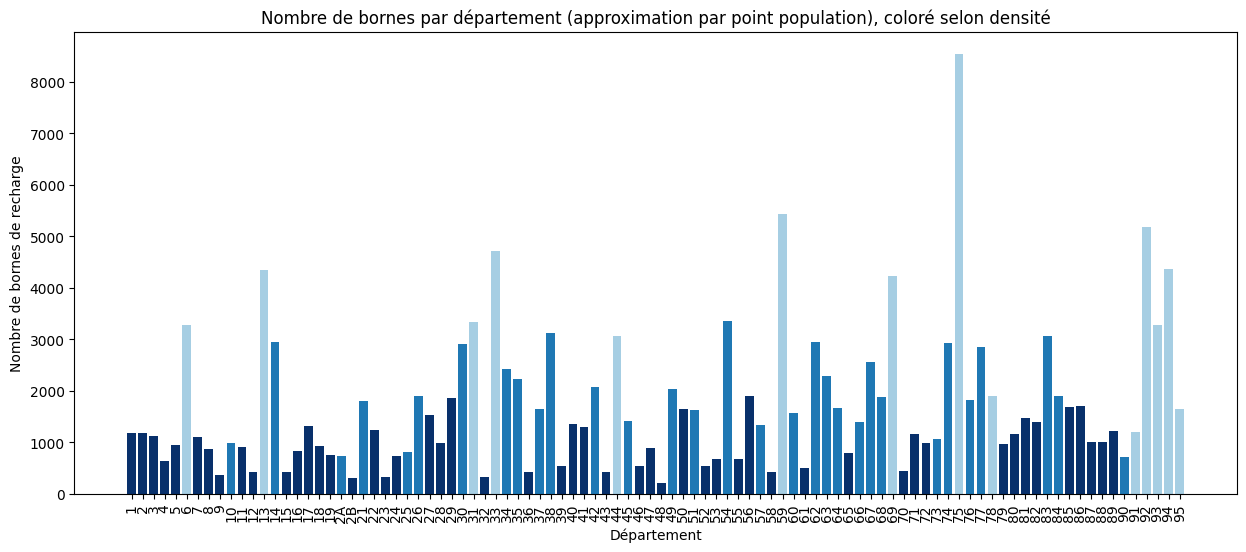

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

# Chargement population
pop = pd.read_csv("../data/raw/population_densite.csv", delimiter=",", encoding='utf-8')
pop['Niv_densité'] = pop['Niv_densité'].astype(int)

# Créer un GeoDataFrame pour pop avec points géométriques
pop['geometry'] = pop.apply(lambda row: Point(row['longitude_decimal'], row['latitude_decimal']), axis=1)
gdf_pop = gpd.GeoDataFrame(pop, geometry='geometry', crs="EPSG:4326")

# Charger bornes
bornes = pd.read_csv("../data/raw/BornesPropres.csv", delimiter=",", encoding='utf-8')
bornes = bornes[(bornes['consolidated_latitude'].notnull()) & (bornes['consolidated_longitude'].notnull())]

# Créer GeoDataFrame bornes
gdf_bornes = gpd.GeoDataFrame(
    bornes, geometry=gpd.points_from_xy(bornes.consolidated_longitude, bornes.consolidated_latitude), crs="EPSG:4326"
)

# Construire un arbre KDTree sur les points pop (longitude, latitude)
pop_coords = list(zip(gdf_pop.geometry.x, gdf_pop.geometry.y))
tree = cKDTree(pop_coords)

# Pour chaque borne, trouver le point pop le plus proche (indice)
bornes_coords = list(zip(gdf_bornes.geometry.x, gdf_bornes.geometry.y))
distances, indices = tree.query(bornes_coords)

# Ajouter au GeoDataFrame bornes la colonne index_pop qui indique le département le plus proche
gdf_bornes['index_pop'] = indices

# Récupérer le code du département (ou un identifiant) depuis gdf_pop via l’index
# Ici je prends la colonne 'Libellé du département' ou 'Departement' ou autre dans pop
# A adapter selon ton CSV
if 'Libellé du département' in gdf_pop.columns:
    dep_col = 'Libellé du département'
elif 'departement' in gdf_pop.columns:
    dep_col = 'departement'
else:
    dep_col = gdf_pop.columns[0]  # prendre la première colonne si tu veux

# Ajouter colonne code_dept à bornes selon le département le plus proche
gdf_bornes['departement_proche'] = gdf_bornes['index_pop'].apply(lambda i: gdf_pop.iloc[i][dep_col])

# Maintenant on peut compter le nombre de bornes par département proche
bornes_count = gdf_bornes.groupby('departement_proche').size().reset_index(name='nb_bornes')

# Merge avec pop pour avoir la densité
df = gdf_pop.merge(bornes_count, left_on=dep_col, right_on='departement_proche', how='left')
df['nb_bornes'] = df['nb_bornes'].fillna(0)

# Couleurs selon densité
colors = {1: '#a6cee3', 2: '#1f78b4', 3: '#08306b'}
df['color'] = df['Niv_densité'].map(colors)

# Bar plot
plt.figure(figsize=(15,6))
plt.bar(df[dep_col], df['nb_bornes'], color=df['color'])
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Nombre de bornes de recharge')
plt.title('Nombre de bornes par département (approximation par point population), coloré selon densité')
plt.show()


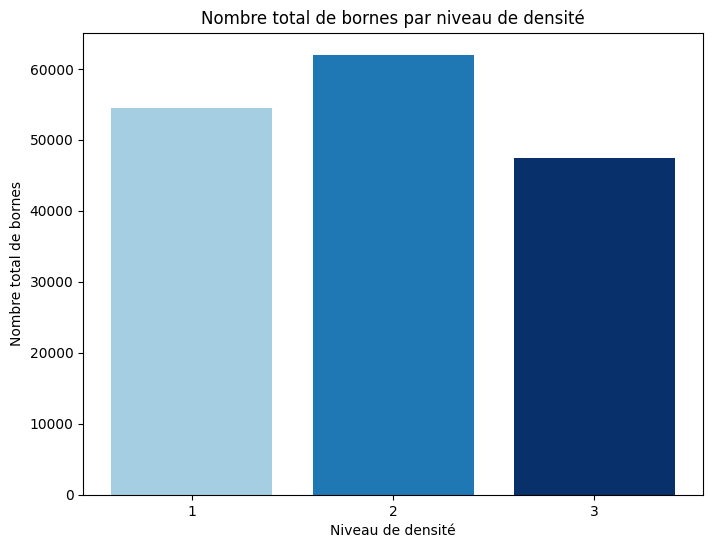

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Après avoir fusionné ta table comme avant (df)

# Regroupement total bornes par niveau de densité
summary = df.groupby('Niv_densité')['nb_bornes'].sum().reset_index()

colors = {1: '#a6cee3', 2: '#1f78b4', 3: '#08306b'}
summary['color'] = summary['Niv_densité'].map(colors)

plt.figure(figsize=(8,6))
plt.bar(summary['Niv_densité'].astype(str), summary['nb_bornes'], color=summary['color'])
plt.xlabel('Niveau de densité')
plt.ylabel('Nombre total de bornes')
plt.title('Nombre total de bornes par niveau de densité')
plt.show()


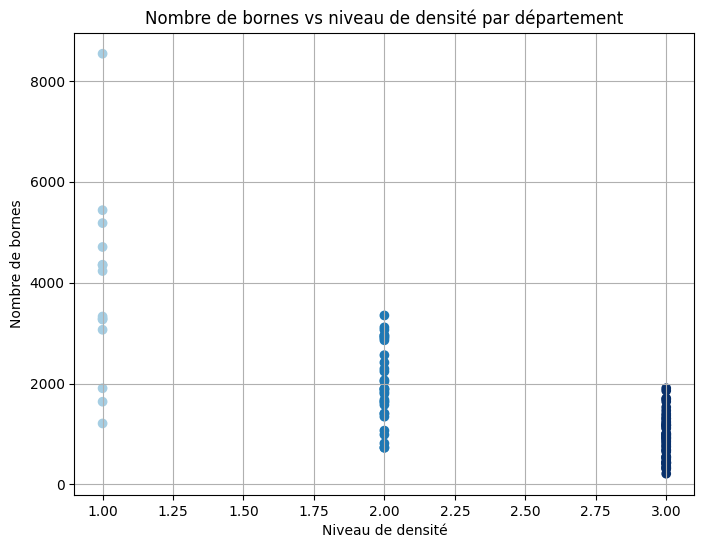

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['Niv_densité'], df['nb_bornes'], c=df['color'])
plt.xlabel('Niveau de densité')
plt.ylabel('Nombre de bornes')
plt.title('Nombre de bornes vs niveau de densité par département')
plt.grid(True)
plt.show()


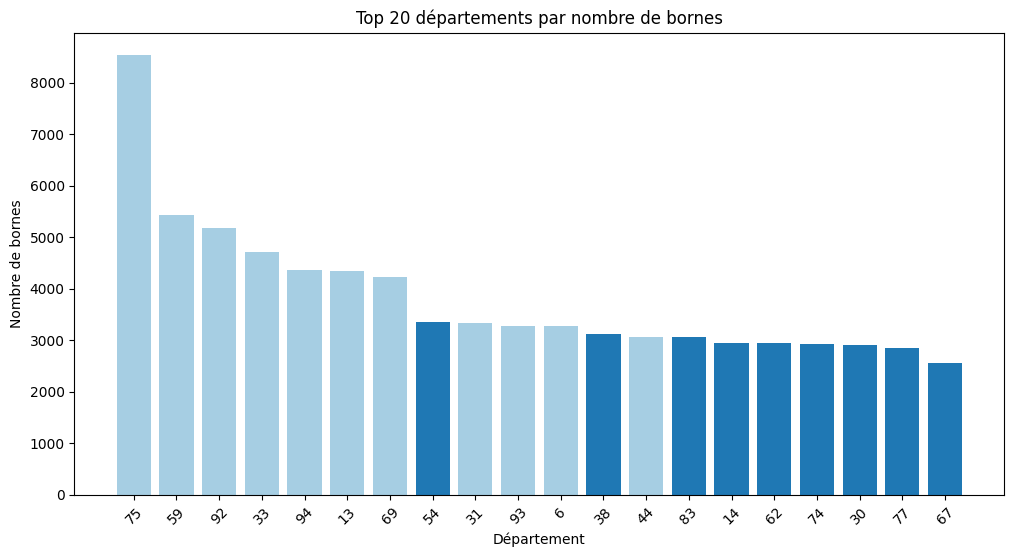

In [17]:
top20 = df.sort_values('nb_bornes', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(top20[dep_col], top20['nb_bornes'], color=top20['color'])
plt.xticks(rotation=45)
plt.xlabel('Département')
plt.ylabel('Nombre de bornes')
plt.title('Top 20 départements par nombre de bornes')
plt.show()
